In [1]:
%matplotlib inline
import sys

import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, '../')

In [2]:
from ada.regression import KernelLasso

In [3]:
def f(x, noise=False):
    y = np.sin(np.pi*x)/(np.pi*x) + 0.1*x
    if noise:
        y += 0.05*np.random.randn(x.shape[0], 1)
    
    return y

In [4]:
n_train, n_test = 50, 1000

x_train = np.linspace(-3, 3, n_train).reshape(-1, 1)
y_train = f(x_train, noise=True)
x_test = np.linspace(-3, 3, n_test).reshape(-1, 1)
y_test = f(x_test)

In [5]:
model = KernelLasso(l1=0.1, h=0.3)
model.fit(x_train, y_train)

KernelLasso(eps=1e-05, h=0.3,
      kernel=<function gaussian_kernel at 0x10da44378>, l1=0.1,
      max_iter=1000000, verbose=False)

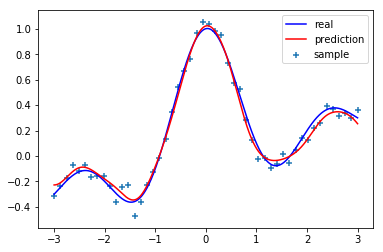

In [6]:
plt.scatter(x_train, y_train, marker='+', label='sample')
plt.plot(x_test, y_test, c='b', label='real')
plt.plot(x_test, model.predict(x_test), c='r', label='prediction')
plt.legend()

In [7]:
print('sparsity: {}'.format(np.sum((np.abs(model.theta) < 1e-5))/model.theta.shape[0]))

sparsity: 0.7
